# LEARNING MATPLOTLIB

# TASK 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("C:/Users/gokul/Downloads/diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


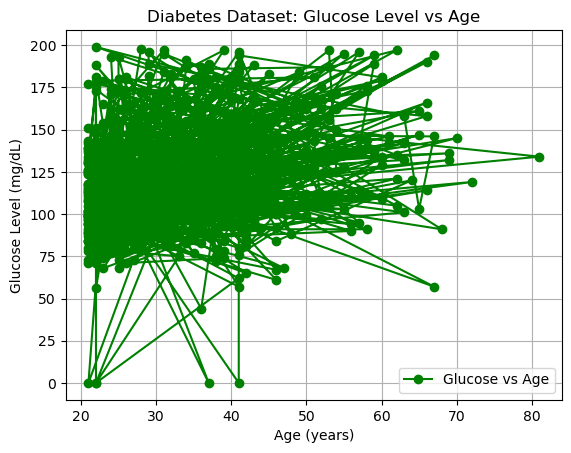

In [80]:
fig, ax = plt.subplots()   # Create figure and axes
ax.plot(data["Age"], data["Glucose"], color="green", marker="o",linestyle="-", label="Glucose vs Age")  # Plot data on axes (Age vs Glucose)
ax.set_xlabel("Age (years)")        # Customize plot (labels, title, legend, grid)
ax.set_ylabel("Glucose Level (mg/dL)")
ax.set_title("Diabetes Dataset: Glucose Level vs Age")
ax.legend()
ax.grid(True)
plt.show()

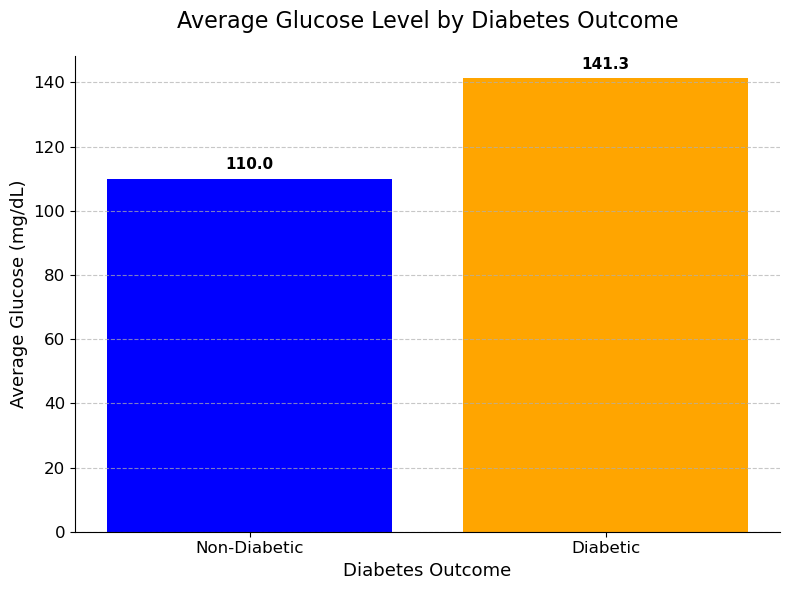

In [82]:
avg_glucose_by_outcome = data.groupby('Outcome')['Glucose'].mean()   # Aggregate data: average glucose by diabetes outcome
outcome_categories = ['Non-Diabetic' if x == 0 else 'Diabetic' for x in avg_glucose_by_outcome.index]
average_glucose = avg_glucose_by_outcome.values
fig, ax = plt.subplots(figsize=(8, 6))  # Create the figure and axes objects
ax.bar(outcome_categories, average_glucose, color=['blue', 'orange'])  # Plot the data on the Axes
ax.set_title('Average Glucose Level by Diabetes Outcome', fontsize=16, pad=20)   # Customize the title, labels, and tick marks
ax.set_xlabel('Diabetes Outcome', fontsize=13)
ax.set_ylabel('Average Glucose (mg/dL)', fontsize=13)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for i, glucose in enumerate(average_glucose):
    ax.text(i, glucose + 2, f'{glucose:.1f}', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()   # Display the figure
plt.show()

# TASK 2

# CHANGING IMAGE CHARACTERISTICS USING MATPLOTLIB

In [17]:
from PIL import Image # Importing PIL library for image data

import matplotlib.pyplot as plt
import numpy as np

In [87]:
img = np.asarray(Image.open("C:/Users/gokul/Downloads/housefly.webp"))  # Importing image data into Numpy arrays
print(repr(img)) # Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

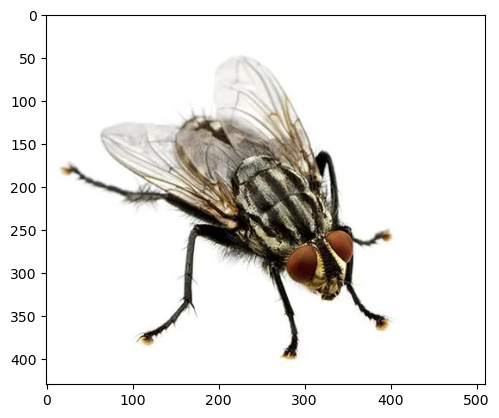

In [89]:
imgplot = plt.imshow(img)   # Plotting numpy arrays as images

Text(0.5, 1.0, 'Pseudocolor of the given Grayscale Image')

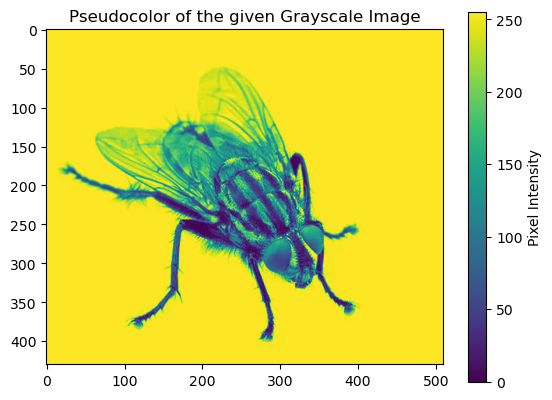

In [93]:
lum_img = img[:, :, 0] # Pseudocolor is only relevant to single-channel, grayscale, luminosity images
plt.imshow(lum_img)    # It is picking one channel(R) of our data and  using array slicing

# Add a colorbar to show the mapping of pixel intensity to color
plt.colorbar(label='Pixel Intensity')
plt.title('Pseudocolor of the given Grayscale Image')

In [95]:
# Print matrix shapes
print("Original image shape:", img.shape)   # (height, width, channels)
print("Luminosity image shape:", lum_img.shape)   # (height, width)
print("\nOriginal pixel (0,0):", img[0, 0])      # full RGB values
print("Luminosity pixel (0,0):", lum_img[0, 0])  # only Red channel value

Original image shape: (430, 510, 3)
Luminosity image shape: (430, 510)

Original pixel (0,0): [255 255 255]
Luminosity pixel (0,0): 255


In [97]:
# Print repr of both
print("repr(img) [truncated]:", repr(img)[:300], "...\n")
print("repr(lum_img) [truncated]:", repr(lum_img)[:300], "...\n")

repr(img) [truncated]: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255 ...

repr(lum_img) [truncated]: array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8) ...



In [99]:
# Expand lum_img to 3 channels for fair diff
lum_expanded = np.stack([lum_img, lum_img, lum_img], axis=-1)
diff = img - lum_expanded   # Difference matrix
print("\nDifference matrix sample (5x5 pixels):")
print(diff[:5, :5, :])


Difference matrix sample (5x5 pixels):
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


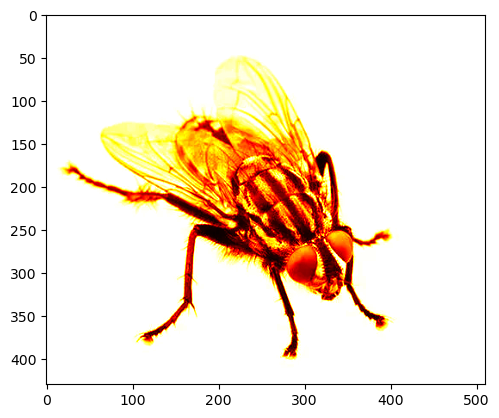

In [31]:
plt.imshow(lum_img, cmap="hot")

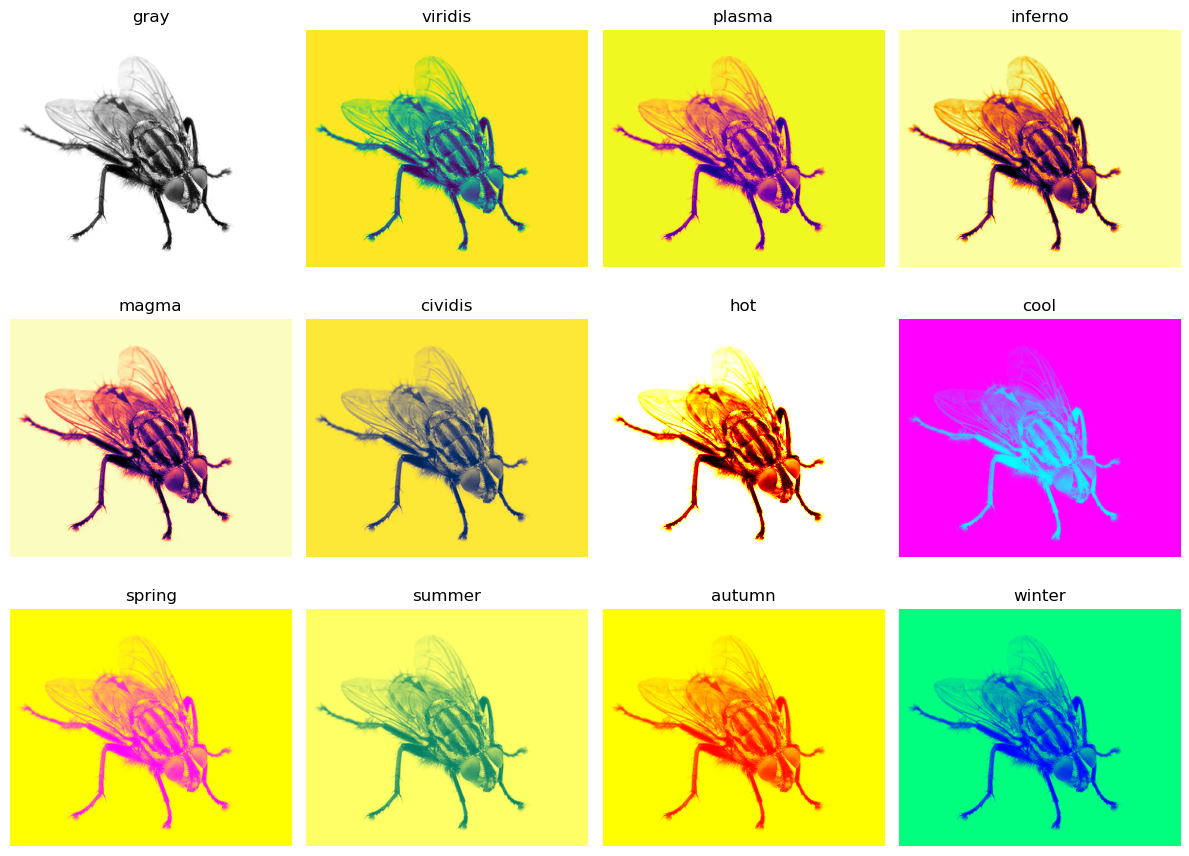

In [101]:
# List of colormaps to demonstrate
cmaps = ["gray", "viridis", "plasma", "inferno", "magma", "cividis", "hot", "cool", "spring", "summer", "autumn", "winter"]
# Plot all colormaps
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for ax, cmap in zip(axs.ravel(), cmaps):
    ax.imshow(lum_img, cmap=cmap)
    ax.set_title(cmap)
    ax.axis("off")

plt.tight_layout()
plt.show()

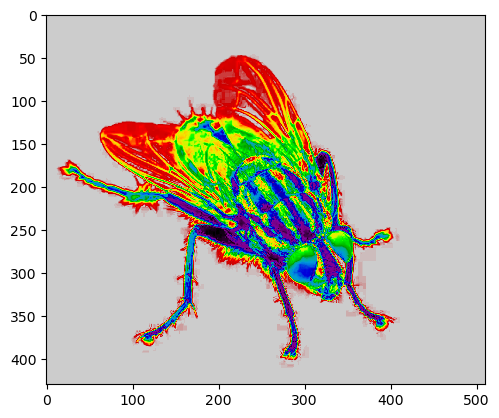

In [35]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

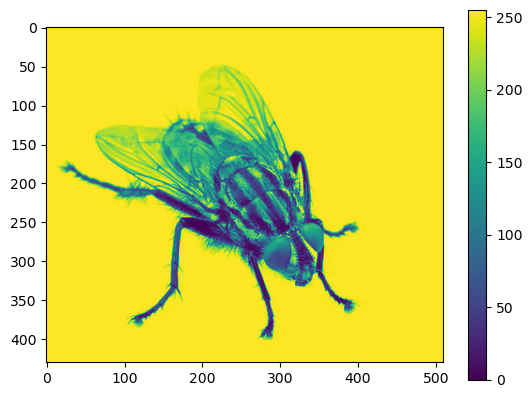

In [37]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

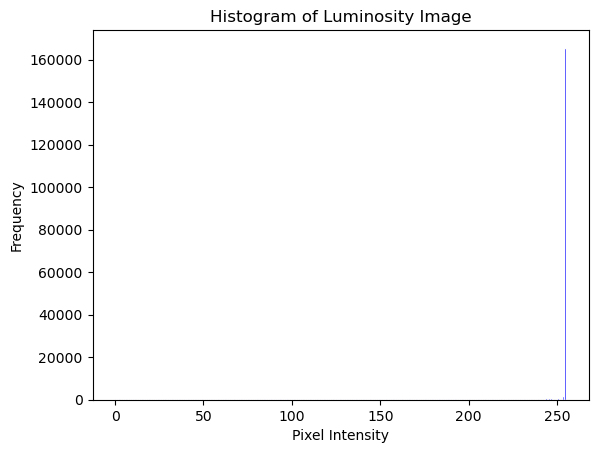

In [103]:
plt.hist(lum_img.ravel(), bins=range(256), fc='blue', ec='white') # bins Set the bins from 0 to 255 (the full range of 8-bit pixel values).
                                                           # fc Set the face color (fc) of the histogram bars to blue.     
                                                           # ec Set the edge color (ec) of the histogram bars to white.
plt.title("Histogram of Luminosity Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

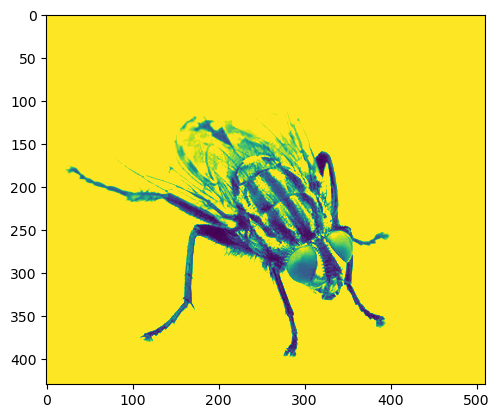

In [41]:
plt.imshow(lum_img, clim=(0, 175))

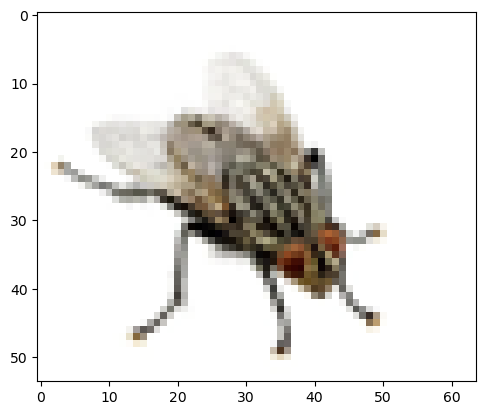

In [43]:
img = Image.open("C:/Users/gokul/Downloads/housefly.webp")
img.thumbnail((64, 64))  # Resize image in-place to 64x64
imgplot = plt.imshow(img)

In [105]:
# Load original image
img_orig = Image.open("C:/Users/gokul/Downloads/housefly.webp")
orig_array = np.array(img_orig)   # Convert to NumPy for comparison
img_resized = img_orig.copy()   
img_resized.thumbnail((64, 64))
resized_array = np.array(img_resized)
print("Original shape:", orig_array.shape)   # Compare shapes
print("Resized shape:", resized_array.shape)
print("Original pixel [0,0]:", orig_array[0,0])   # Compare a sample pixel
print("Resized pixel [0,0]:", resized_array[0,0])

Original shape: (430, 510, 3)
Resized shape: (54, 64, 3)
Original pixel [0,0]: [255 255 255]
Resized pixel [0,0]: [255 255 255]


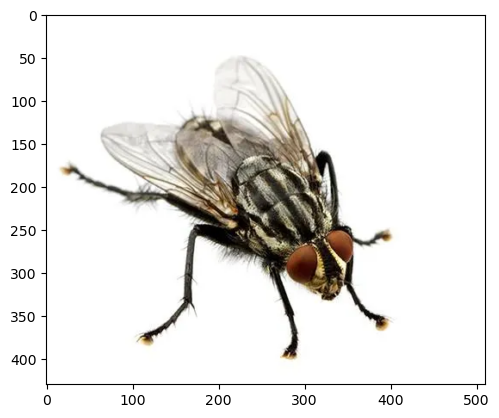

In [107]:
imgplot = plt.imshow(img, interpolation="bilinear")

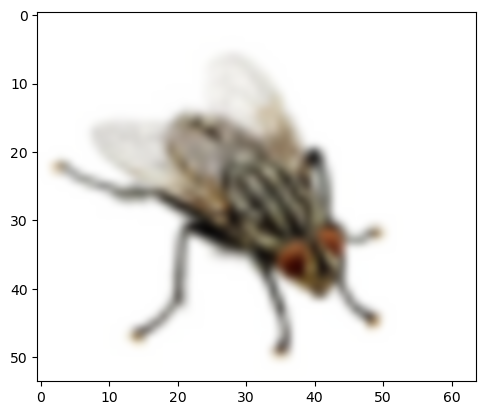

In [49]:
imgplot = plt.imshow(img, interpolation="bicubic") # resampling method bicubic in PIL

# TASK 3

# INVERSE OR NEGATIVE OF THE IMAGE

In [110]:
img = Image.open("C:/Users/gokul/Downloads/housefly.webp")          # load image
img = img.convert("RGB")  # ensure 3 channels
img_array = np.array(img)   

In [112]:
print("Original Image array: ",img_array)

Original Image array:  [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [57]:
# Find the inverse (negative image)
# For 8-bit images, max pixel value is 255
negative_img_array = 255 - img_array
print("Inverted Image Array",negative_img_array)

Inverted Image Array [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


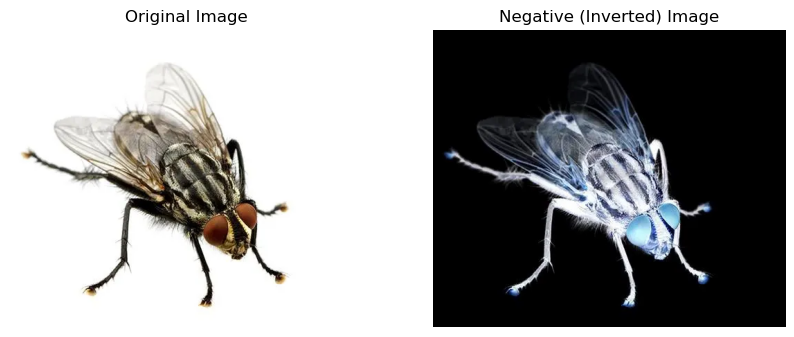

In [114]:
# Display original and negative side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_array)
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(negative_img_array)
axs[1].set_title("Negative (Inverted) Image")
axs[1].axis("off")
plt.show()

# TASK 4

# PLOT NUMERICAL/ TEXT/ CATEGORICAL/ IMAGE DATAS

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# NUMERICAL DATA

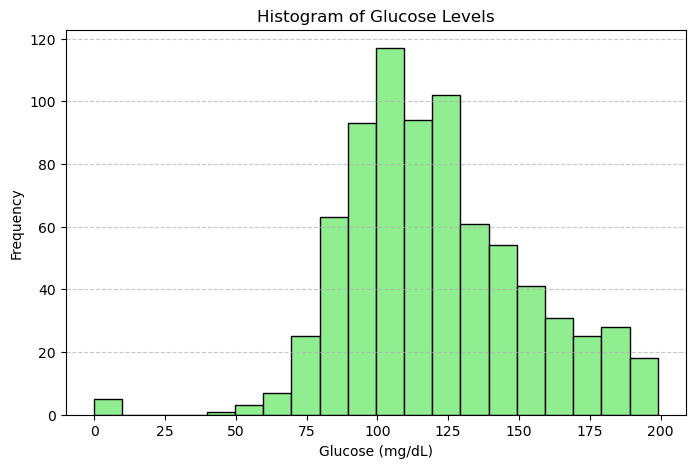

In [121]:
# Load Diabetes dataset
data = pd.read_csv("C:/Users/gokul/Downloads/diabetes.csv")
plt.figure(figsize=(8, 5))    # Plot histogram of Glucose levels
plt.hist(data['Glucose'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram of Glucose Levels")       # Frequency of glucose values
plt.xlabel("Glucose (mg/dL)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light horizontal grid for readability
plt.show()

# CATEGORICAL DATA

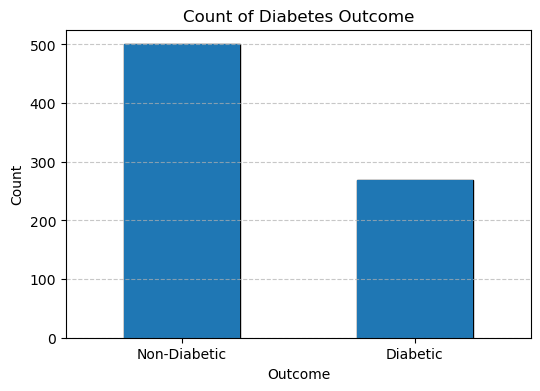

In [73]:
# Plot count of diabetic vs non-diabetic patients
plt.figure(figsize=(6, 4))
data['Outcome'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
data['Outcome'].replace({0: "Non-Diabetic", 1: "Diabetic"}).value_counts().plot(kind='bar')
plt.title("Count of Diabetes Outcome")    # y-axis shows count of each category
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep category labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# IMAGE DATA

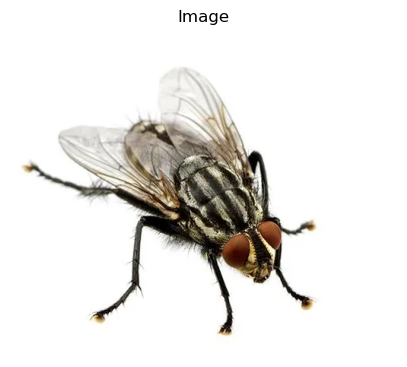

In [127]:
from PIL import Image
img = Image.open("C:/Users/gokul/Downloads/housefly.webp")  # load an image
plt.figure(figsize=(5,5))
plt.imshow(img)  # Displays the image
plt.axis("off")
plt.title("Image")
plt.show()